In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

# 散点图(Scatter)

In [3]:
import math, operator, torch
from functools import partial
import matplotlib.pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

In [4]:
torch.manual_seed(42)
torch.set_printoptions(precision=3, linewidth=140, sci_mode=False)

In [5]:
n_clusters=6
n_samples =250

centroids = torch.rand(n_clusters, 2)*70-35

In [6]:
def sample(m): return MultivariateNormal(m, torch.diag(tensor([5.,5.]))).sample((n_samples,))

In [7]:
slices = [sample(c) for c in centroids]
data = torch.cat(slices)
data.shape

torch.Size([1500, 2])

In [16]:
data[:, 0]

tensor([26.204, 25.691, 30.431,  ..., 30.772, 29.354, 31.168])

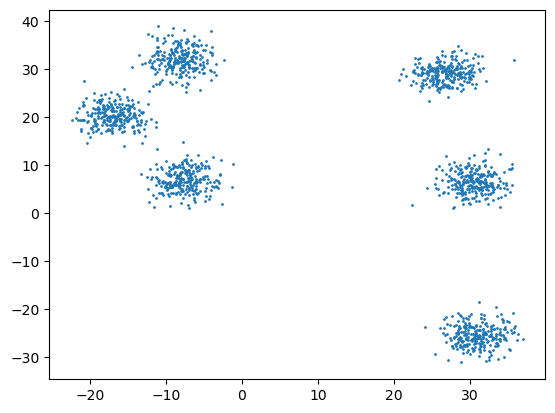

In [22]:
plt.scatter(data[:, 0], data[:, 1], s=1)

In [23]:
def plot_data(centroids, data, n_samples, ax=None):
    if ax is None: _,ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:,0], samples[:,1], s=1)
        ax.plot(*centroid, markersize=10, marker="x", color='k', mew=5)
        ax.plot(*centroid, markersize=5, marker="x", color='m', mew=2)

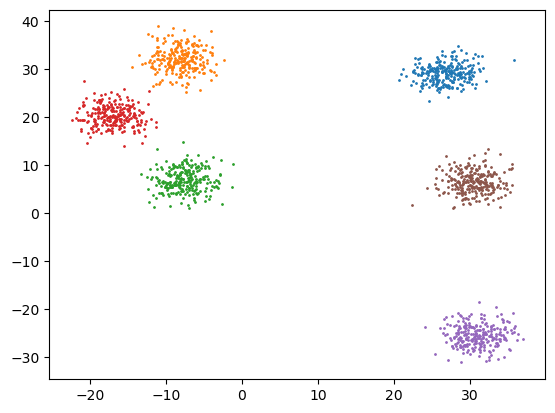

In [19]:
plot_data(centroids, data, n_samples)

## 折线图

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas._testing as tm

# 创建一个包含ABCD的测试数据
df = tm.makeTimeDataFrame(3)
df.head()

,A,B,C,D
2000-01-03,0.189053,0.189053,0.189053,0.189053
2000-01-04,-0.522748,-0.522748,-0.522748,-0.522748
2000-01-05,-0.413064,-0.413064,-0.413064,-0.413064


/Users/hawkins/miniconda3/envs/ai3/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/hawkins/miniconda3/envs/ai3/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/hawkins/miniconda3/envs/ai3/lib/python3.10/site-packages/matplotlib/axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
/Users/hawkins/miniconda3/envs/ai3/lib/python3.10/site-packages/matplotlib/axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with f

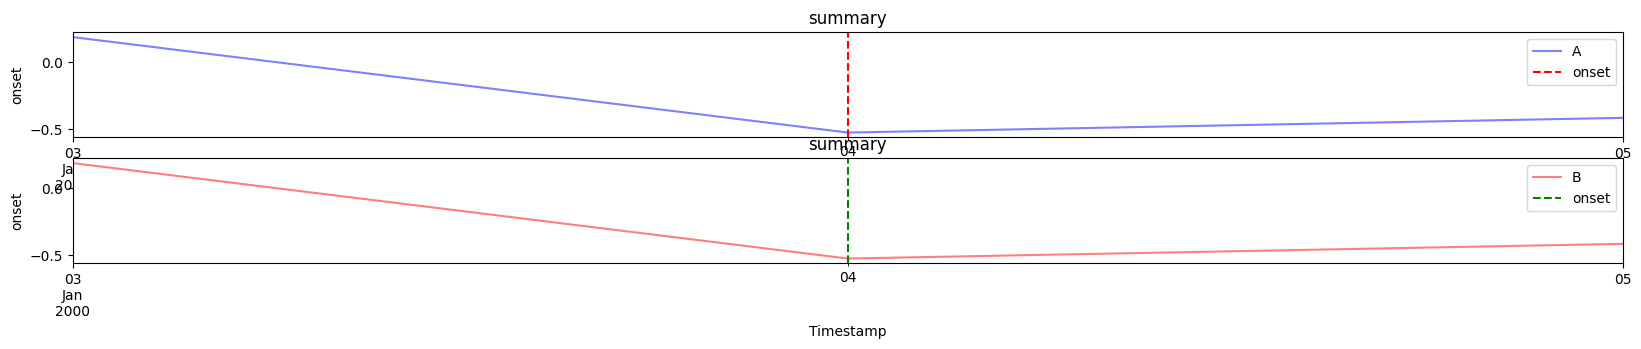

In [51]:
# plt.plot(df['A'], df['B'])
# 显示图形
# plt.show()

# df.plot(x='A', y='B')

fig, axes = plt.subplots(2, 1, figsize=(20, 3), height_ratios=(0.5,0.5))
df['A'].plot(ax=axes[0], color='b', alpha=0.5, xlabel='xx')
axes[0].axvline(x='2000-01-04', color='r', linestyle='--', label='onset')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('onset')
axes[0].set_title('summary')
axes[0].legend()

df['B'].plot(ax=axes[1], color='r', alpha=0.5)
axes[1].axvline(x='2000-01-04', color='g', linestyle='--', label='onset')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('onset')
axes[1].set_title('summary')
axes[1].legend()

plt.show()

# 柱状图

/Users/hawkins/miniconda3/envs/ai3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hawkins/miniconda3/envs/ai3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hawkins/miniconda3/envs/ai3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hawkins/miniconda3/envs/ai3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hawkins/miniconda3/envs/ai3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

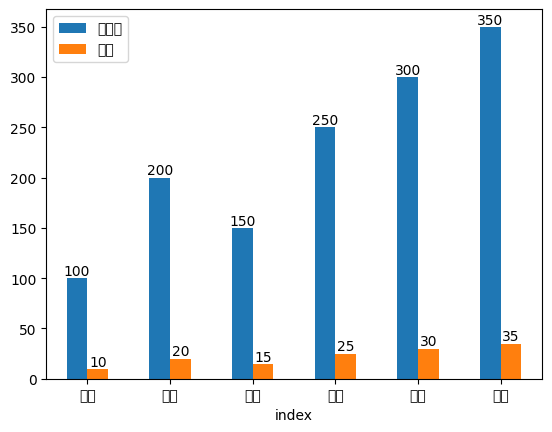

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建一个包含两列数据的数据框
data = {'销售额': [100, 200, 150, 250, 300, 350],
        '利润': [10, 20, 15, 25, 30, 35]}
index = ['东区', '南区', '西区', '北区', '中区', '外区']
df = pd.DataFrame(data, index=index)

# 创建条形图
df_reset = df.reset_index()
# 其中，rot=0参数表示将横轴标签旋转为水平方向
ax = df_reset.plot.bar(x='index', y=['销售额', '利润'], rot=0)

# 添加标签,label_type='edge'参数表示在柱状图上方添加标签
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=10)

# 显示图形
plt.show()